<a href="https://colab.research.google.com/github/LittlePandaCode/British_Airways/blob/main/ba_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

booking=pd.read_csv(r'/content/drive/MyDrive/Datasets/customer_booking.csv', encoding='latin-1')


### ***Label encoding***

In [ ]:
booking.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0


In [ ]:
# sales_channel has 2 values and we will encode it as: Internet=1 and Mobile=2
mapping = {
    "Internet": 1,
    "Mobile": 2,
}
booking["sales_channel"] = booking["sales_channel"].map(mapping)
# the same for trip_type, it'll be encoded as:
mapping1 = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,
}
booking["trip_type"] = booking["trip_type"].map(mapping1)

# we do the same for flight_day:
mapping2 = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}
booking["flight_day"] = booking["flight_day"].map(mapping2)



In [ ]:
booking.drop(columns=['booking_origin','route'],inplace=True)

## **Train a machine learning model**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

train, test= train_test_split(booking, test_size=0.2, random_state=42, shuffle=True)
train_y=train.pop('booking_complete')
test_y=test.pop('booking_complete')
model= RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(train,train_y)

RandomForestClassifier(random_state=42)

## **Evaluate model and present findings**

In [ ]:
from sklearn.metrics import classification_report
predictions=model.predict(test)
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.41      0.06      0.10      1480

    accuracy                           0.85     10000
   macro avg       0.63      0.52      0.51     10000
weighted avg       0.79      0.85      0.80     10000



In [ ]:
from sklearn.model_selection import  cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

X = booking.drop(columns='booking_complete')
y = booking['booking_complete']

k_folds = 5

# Perform k-fold cross-validation
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, train, train_y, cv=kf, scoring='accuracy')

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))

Cross-validation scores: [0.843625 0.854625 0.846    0.84525  0.849125]
Average cross-validation score: 0.847725


## **Features contribution in the model predictions**

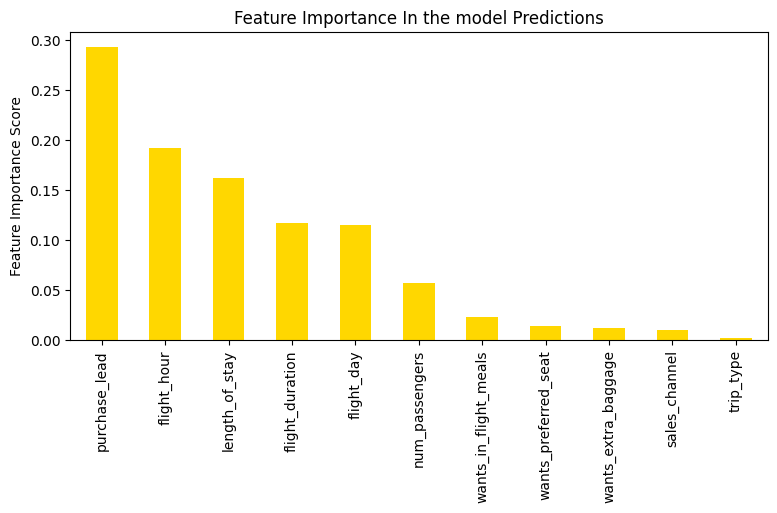

In [ ]:
feature_importance = pd.Series(model.feature_importances_, index=train.columns).sort_values(ascending=False)
plt.figure(figsize=(9, 4))
feature_importance.plot(kind='bar',color='gold')
plt.ylabel('Feature Importance Score')
plt.title('Feature Importance In the model Predictions')
plt.show()